In [1]:
#### PCA Test ####
gc()

#設定工作目錄
setwd("/Users/huangyiling/GitHub/EB101_TeamSpade_project/DataModel/people_Model3")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,519217,27.8,1162317,62.1,642320,34.4
Vcells,985607,7.6,8388608,64.0,1774282,13.6


In [2]:
# 安裝必要套件
# install.packages("factoextra")
# install.packages("FactoMineR")
# install.packages("ade4")
# install.packages("magrittr")
# install.packages("ggplot2")

In [3]:
# 載入必要套件
library(ade4)
library(factoextra)
library(FactoMineR)
library(ggplot2)
library(magrittr)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Attaching package: ‘FactoMineR’

The following object is masked from ‘package:ade4’:

    reconst



In [4]:
# 載入資料
data_all<-read.csv("peopleSample2.csv")
head(data_all)

X,Sex,Age,Height,Weight,BMI,Calories,Moisture,Protein,Saturated_fat,...,Zn,P,VitaminA,VitaminE,VitaminB_group,VitaminC,Fatty_acid_S,Fatty_acid_M,Fatty_acid_P,Cholesterol
0,0,19,140,31.4,16,1408.4,942,34.5,140.8,...,12,800,500,12,20.59,100,140.8,84.5,12.7,300
1,0,19,141,31.8,16,1425.1,954,35.0,142.5,...,12,800,500,12,20.59,100,142.5,85.5,12.8,300
2,0,19,142,32.3,16,1445.4,969,35.5,144.5,...,12,800,500,12,20.59,100,144.5,86.7,13.0,300
3,0,19,143,32.7,16,1462.1,981,36.0,146.2,...,12,800,500,12,20.59,100,146.2,87.7,13.2,300
4,0,19,144,33.2,16,1482.3,996,36.5,148.2,...,12,800,500,12,20.59,100,148.2,88.9,13.3,300
5,0,19,145,33.6,16,1498.8,1008,37.0,149.9,...,12,800,500,12,20.59,100,149.9,89.9,13.5,300


In [5]:
# 查看 data 資料結構
str(data_all)

'data.frame':	91200 obs. of  27 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Sex           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Age           : int  19 19 19 19 19 19 19 19 19 19 ...
 $ Height        : int  140 141 142 143 144 145 146 147 148 149 ...
 $ Weight        : num  31.4 31.8 32.3 32.7 33.2 33.6 34.1 34.6 35 35.5 ...
 $ BMI           : int  16 16 16 16 16 16 16 16 16 16 ...
 $ Calories      : num  1408 1425 1445 1462 1482 ...
 $ Moisture      : num  942 954 969 981 996 ...
 $ Protein       : num  34.5 35 35.5 36 36.5 37 37.5 38.1 38.5 39.1 ...
 $ Saturated_fat : num  141 142 144 146 148 ...
 $ Carbohydrate  : num  817 827 838 848 860 ...
 $ Dietary_fiber : int  27 27 27 27 27 27 27 27 27 27 ...
 $ Na            : int  2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 ...
 $ K             : int  4700 4700 4700 4700 4700 4700 4700 4700 4700 4700 ...
 $ Ca            : int  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Mg            : int  320 320 320 320 

In [6]:
# data_index = data_all[1]
# data_index

In [7]:
data<-data_all[,7:27]
data

Calories,Moisture,Protein,Saturated_fat,Carbohydrate,Dietary_fiber,Na,K,Ca,Mg,...,Zn,P,VitaminA,VitaminE,VitaminB_group,VitaminC,Fatty_acid_S,Fatty_acid_M,Fatty_acid_P,Cholesterol
1408.4,942,34.5,140.8,816.9,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,140.8,84.5,12.7,300
1425.1,954,35.0,142.5,826.6,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,142.5,85.5,12.8,300
1445.4,969,35.5,144.5,838.3,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,144.5,86.7,13.0,300
1462.1,981,36.0,146.2,848.0,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,146.2,87.7,13.2,300
1482.3,996,36.5,148.2,859.7,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,148.2,88.9,13.3,300
1498.8,1008,37.0,149.9,869.3,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,149.9,89.9,13.5,300
1518.9,1023,37.5,151.9,881.0,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,151.9,91.1,13.7,300
1538.9,1038,38.1,153.9,892.6,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,153.9,92.3,13.9,300
1555.4,1050,38.5,155.5,902.1,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,155.5,93.3,14.0,300
1575.3,1065,39.1,157.5,913.7,27,2400,4700,1000,320,...,12,800,500,12,20.59,100,157.5,94.5,14.2,300


In [8]:
# 主成分分析
# data.pca <- dudi.pca(data)

In [9]:
# 主成分分析（保留 5 個主成分） dudi會先正規化
data.pca <- dudi.pca(df = data, scannf = FALSE, nf = 5)
data.pca

Duality diagramm
class: pca dudi
$call: dudi.pca(df = data, scannf = FALSE, nf = 5)

$nf: 5 axis-components saved
$rank: 10
eigen values: 7.386 5.236 0.7243 0.5087 0.09084 ...
  vector length mode    content       
1 $cw    21     numeric column weights
2 $lw    91200  numeric row weights   
3 $eig   10     numeric eigen values  

  data.frame nrow  ncol content             
1 $tab       91200 21   modified array      
2 $li        91200 5    row coordinates     
3 $l1        91200 5    row normed scores   
4 $co        21    5    column coordinates  
5 $c1        21    5    column normed scores
other elements: cent norm 

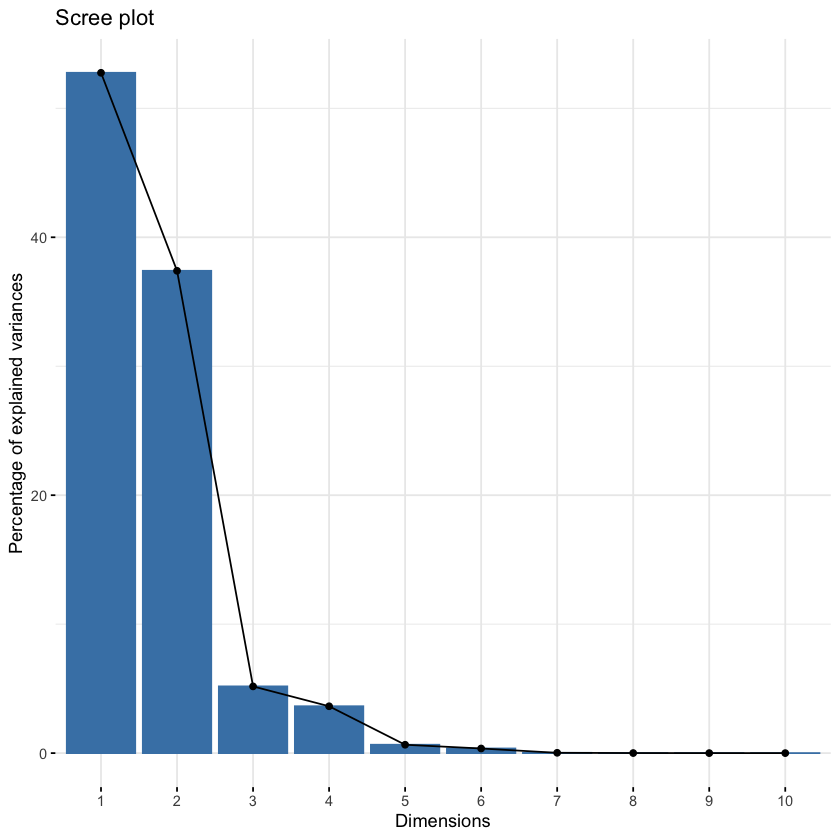

In [10]:
# 陡坡圖（Scree Plot）
fviz_eig(data.pca)

In [11]:
# modified array  
# data.pca$tab

In [12]:
# row coordinates 
tt = data.pca$li
str(tt)
write.csv(tt,"peopleSample_new.csv", row.names = TRUE)

'data.frame':	91200 obs. of  5 variables:
 $ Axis1: num  6.73 6.61 6.46 6.33 6.19 ...
 $ Axis2: num  -2.31 -2.31 -2.31 -2.31 -2.31 ...
 $ Axis3: num  0.725 0.736 0.751 0.763 0.777 ...
 $ Axis4: num  -1.15 -1.12 -1.08 -1.05 -1.01 ...
 $ Axis5: num  0.293 0.286 0.272 0.259 0.25 ...


In [13]:
# row normed scores
data.pca$ll

NULL

In [14]:
data.pca$co

,Comp1,Comp2,Comp3,Comp4,Comp5
Calories,-7.551256e-01,-2.093693e-03,2.393401e-01,6.025681e-01,8.030936e-02
Moisture,-9.620205e-01,-1.078939e-02,-1.340959e-01,-1.986524e-01,7.689844e-02
Protein,-9.541503e-01,-1.532784e-02,-1.680624e-01,-1.949763e-01,1.241989e-01
Saturated_fat,-9.976104e-01,-6.136084e-03,1.342582e-02,-1.292504e-02,-5.051797e-02
Carbohydrate,-9.976113e-01,-6.136056e-03,1.342267e-02,-1.293160e-02,-5.051177e-02
Dietary_fiber,-3.161595e-02,9.565084e-01,2.564753e-01,-7.097114e-02,-8.967462e-02
Na,1.798121e-23,2.471241e-27,9.305232e-27,1.546645e-19,1.171502e-26
K,-2.777740e-27,2.243609e-27,9.012011e-23,-1.162726e-27,1.633857e-20
Ca,3.475186e-28,-2.389177e-28,-9.920833e-28,1.244282e-28,5.653207e-28
Mg,-2.958519e-02,9.670490e-01,1.989723e-01,-4.869430e-02,-1.167469e-01


In [15]:
data.pca$cl

NULL

In [16]:
# 取得每個主成分變異數（特徵值）
get_eig(data.pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,7.385699e+00,5.275499e+01,52.75499
Dim.2,5.236057e+00,3.740041e+01,90.15540
Dim.3,7.243386e-01,5.173848e+00,95.32925
Dim.4,5.087457e-01,3.633898e+00,98.96315
Dim.5,9.083802e-02,6.488430e-01,99.61199
Dim.6,5.023550e-02,3.588250e-01,99.97081
Dim.7,3.321969e-03,2.372835e-02,99.99454
Dim.8,6.895133e-04,4.925095e-03,99.99947
Dim.9,7.272975e-05,5.194982e-04,99.99999
Dim.10,1.876859e-06,1.340614e-05,100.00000


In [17]:
# 陡坡圖（Scree Plot）
# screeplot(data.pca)

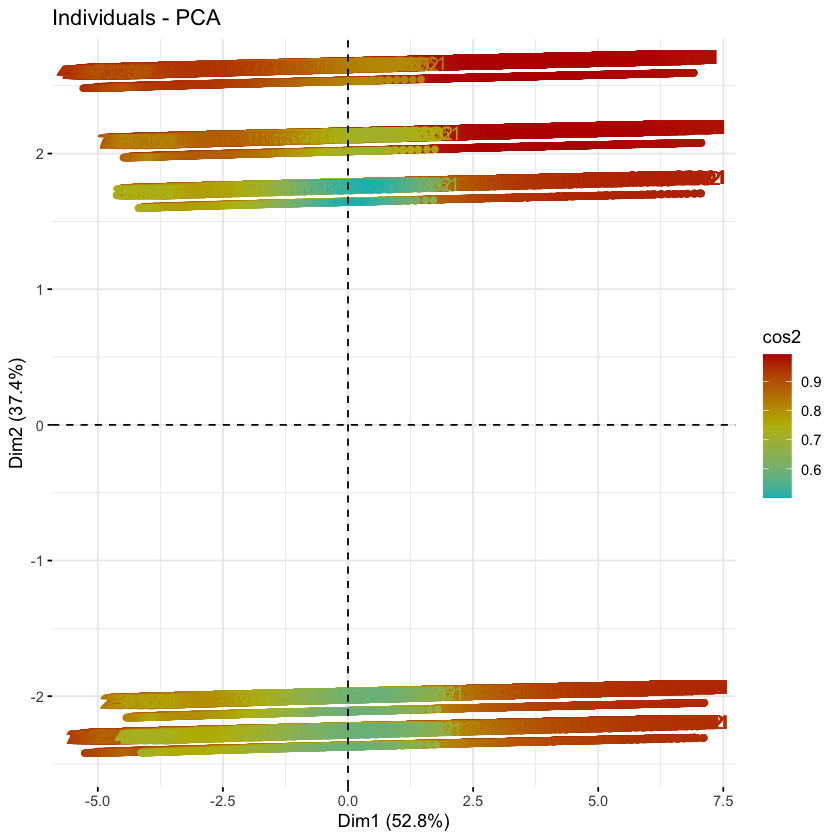

In [18]:
# 顯示每個個體在前兩個主成分上的分布圖
fviz_pca_ind(data.pca,
             col.ind = "cos2",           
             #repel = TRUE,               
             gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"))
# 依據主成分對該個體的重要性上色
# 避免文字重疊

In [19]:
data.pca.ind <- get_pca_ind(data.pca)
data.pca.ind
data.pca.ind$coord
data.pca.ind$contrib
data.pca.ind$cos2

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
6.729464,-2.307124,0.7245930,-1.1540882,0.293242075
6.610950,-2.308079,0.7359570,-1.1226211,0.285977064
6.460956,-2.309262,0.7510581,-1.0834615,0.271617287
6.330352,-2.310305,0.7629417,-1.0525914,0.258829561
6.192544,-2.311400,0.7774256,-1.0131281,0.249900000
6.062321,-2.312441,0.7891059,-0.9828352,0.237012931
5.912520,-2.313623,0.8040117,-0.9442621,0.222468155
5.761214,-2.314838,0.8178056,-0.9073661,0.210016442
5.647233,-2.315739,0.8298710,-0.8749665,0.201631584
5.496023,-2.316954,0.8435673,-0.8383637,0.189087372


Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
0.0067231774,0.001114661,0.0007947888,2.870665e-03,1.037983e-03
0.0064884557,0.001115584,0.0008199142,2.716257e-03,9.871881e-04
0.0061973661,0.001116728,0.0008539070,2.530064e-03,8.905377e-04
0.0059493480,0.001117737,0.0008811426,2.387944e-03,8.086587e-04
0.0056931393,0.001118796,0.0009149160,2.212245e-03,7.538241e-04
0.0054562149,0.001119804,0.0009426144,2.081929e-03,6.780810e-04
0.0051898980,0.001120949,0.0009785618,1.921718e-03,5.974110e-04
0.0049276693,0.001122127,0.0010124269,1.774473e-03,5.324074e-04
0.0047346188,0.001123001,0.0010425208,1.650013e-03,4.907436e-04
0.0044844659,0.001124179,0.0010772165,1.514849e-03,4.315812e-04


Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
0.8594417,0.1010177,0.009964228,0.0252774606,1.631954e-03
0.8561546,0.1043580,0.010610341,0.0246882800,1.602090e-03
0.8518018,0.1088157,0.011510444,0.0239536648,1.505427e-03
0.8476757,0.1129049,0.012312795,0.0234365448,1.417104e-03
0.8431481,0.1174670,0.013288726,0.0225680659,1.373087e-03
0.8384870,0.1220000,0.014206563,0.0220383904,1.281630e-03
0.8328413,0.1275270,0.015400746,0.0212423303,1.179106e-03
0.8266302,0.1334518,0.016656489,0.0205044609,1.098474e-03
0.8217467,0.1381802,0.017745480,0.0197264707,1.047571e-03
0.8146982,0.1447886,0.019192834,0.0189567802,9.643278e-04


In [20]:
# 個體相關資料
data.pca.ind <- get_pca_ind(data.pca)
data.pca.ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [21]:
data.pca.ind$coord   # 座標

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
6.729464,-2.307124,0.7245930,-1.1540882,0.293242075
6.610950,-2.308079,0.7359570,-1.1226211,0.285977064
6.460956,-2.309262,0.7510581,-1.0834615,0.271617287
6.330352,-2.310305,0.7629417,-1.0525914,0.258829561
6.192544,-2.311400,0.7774256,-1.0131281,0.249900000
6.062321,-2.312441,0.7891059,-0.9828352,0.237012931
5.912520,-2.313623,0.8040117,-0.9442621,0.222468155
5.761214,-2.314838,0.8178056,-0.9073661,0.210016442
5.647233,-2.315739,0.8298710,-0.8749665,0.201631584
5.496023,-2.316954,0.8435673,-0.8383637,0.189087372


In [22]:
ii =data.pca.ind$coord # 座標 
write.csv(ii, "peopleSample3_new.csv", row.names = TRUE)

In [23]:
data.pca.ind$contrib # 對主成分的貢獻度

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
0.0067231774,0.001114661,0.0007947888,2.870665e-03,1.037983e-03
0.0064884557,0.001115584,0.0008199142,2.716257e-03,9.871881e-04
0.0061973661,0.001116728,0.0008539070,2.530064e-03,8.905377e-04
0.0059493480,0.001117737,0.0008811426,2.387944e-03,8.086587e-04
0.0056931393,0.001118796,0.0009149160,2.212245e-03,7.538241e-04
0.0054562149,0.001119804,0.0009426144,2.081929e-03,6.780810e-04
0.0051898980,0.001120949,0.0009785618,1.921718e-03,5.974110e-04
0.0049276693,0.001122127,0.0010124269,1.774473e-03,5.324074e-04
0.0047346188,0.001123001,0.0010425208,1.650013e-03,4.907436e-04
0.0044844659,0.001124179,0.0010772165,1.514849e-03,4.315812e-04


In [24]:
data.pca.ind$cos2    # 主成分對該個體的重要性

Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
0.8594417,0.1010177,0.009964228,0.0252774606,1.631954e-03
0.8561546,0.1043580,0.010610341,0.0246882800,1.602090e-03
0.8518018,0.1088157,0.011510444,0.0239536648,1.505427e-03
0.8476757,0.1129049,0.012312795,0.0234365448,1.417104e-03
0.8431481,0.1174670,0.013288726,0.0225680659,1.373087e-03
0.8384870,0.1220000,0.014206563,0.0220383904,1.281630e-03
0.8328413,0.1275270,0.015400746,0.0212423303,1.179106e-03
0.8266302,0.1334518,0.016656489,0.0205044609,1.098474e-03
0.8217467,0.1381802,0.017745480,0.0197264707,1.047571e-03
0.8146982,0.1447886,0.019192834,0.0189567802,9.643278e-04


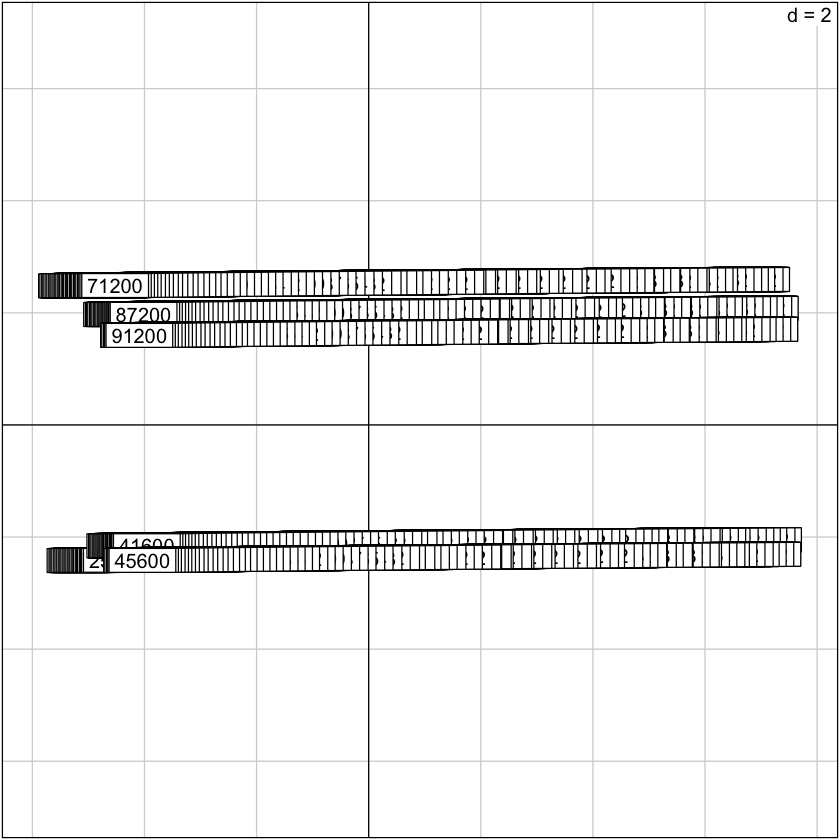

In [25]:
# 個體分布圖
s.label(data.pca$li,
        xax = 1,  # 主成分 1
        yax = 2)  # 主成分 2

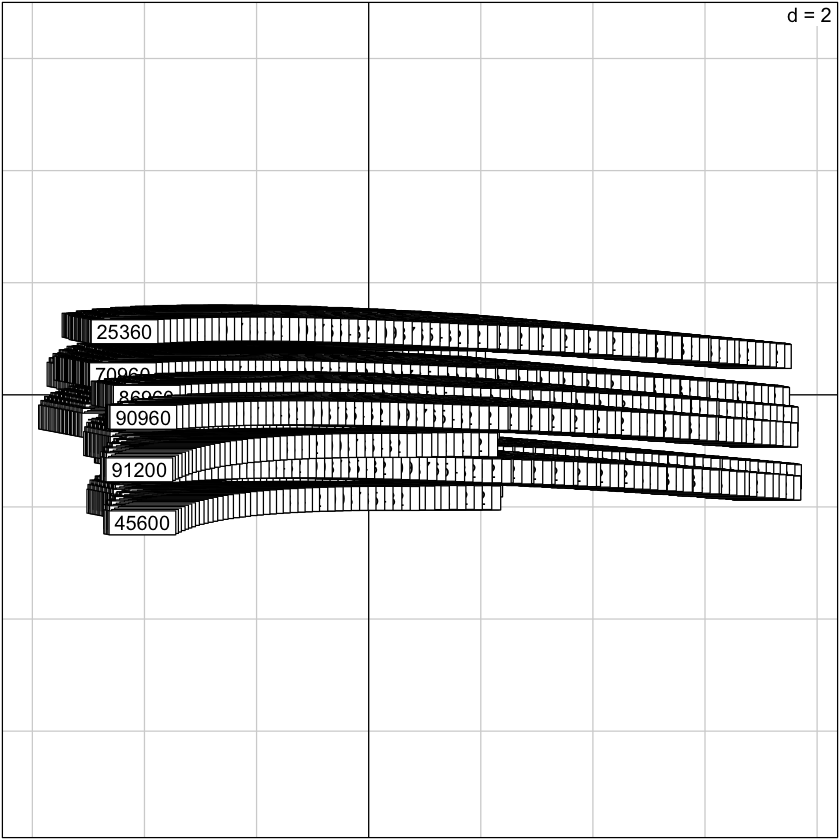

In [26]:
s.label(data.pca$li,
        xax = 1,  # 主成分 1
        yax = 3)  # 主成分 3

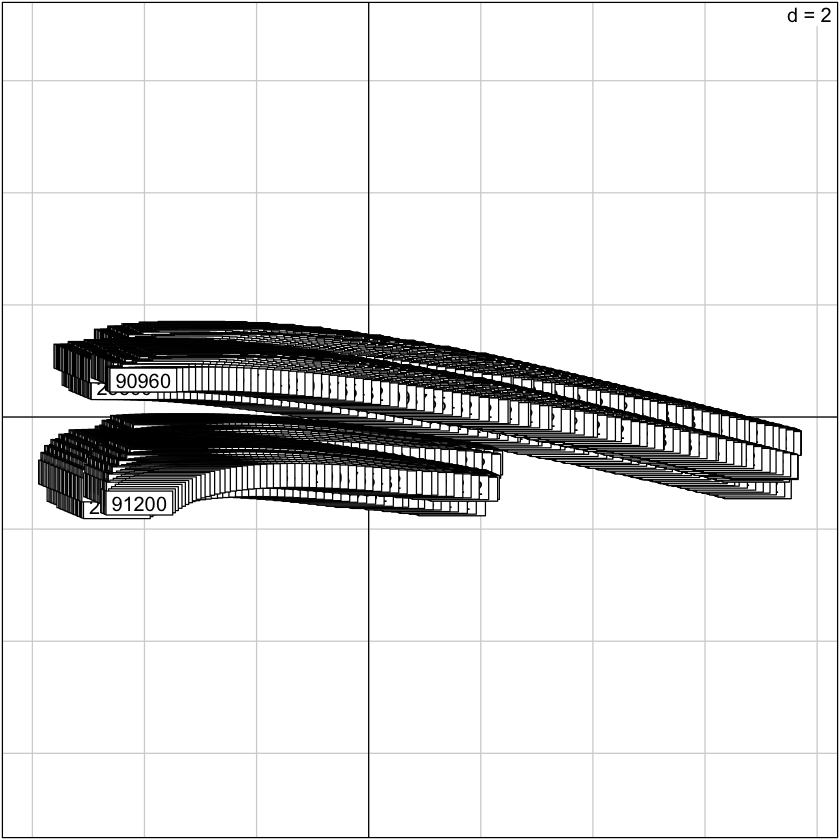

In [27]:
s.label(data.pca$li,
        xax = 1,  # 主成分 1
        yax = 4)  # 主成分 4

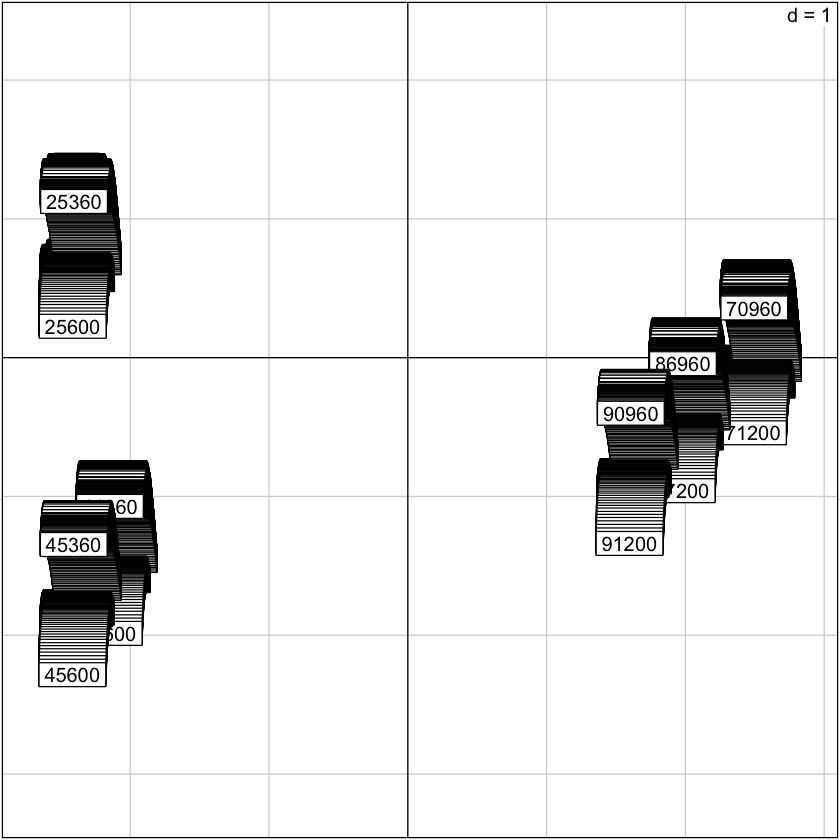

In [28]:
s.label(data.pca$li,
        xax = 2,  # 主成分 2
        yax = 3)  # 主成分 3

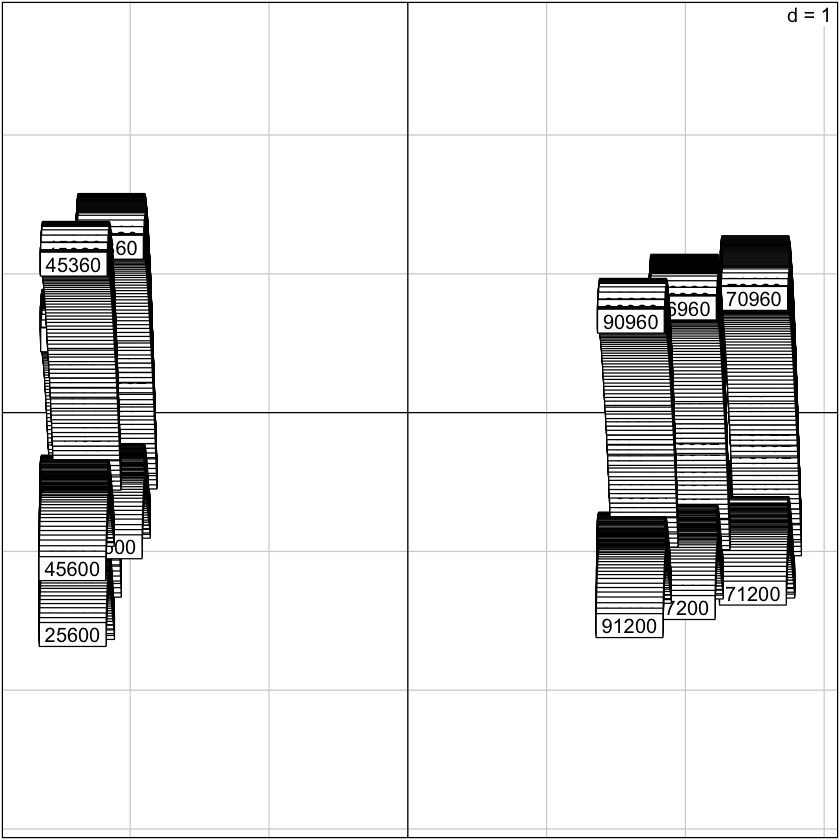

In [29]:
s.label(data.pca$li,
        xax = 2,  # 主成分 2
        yax = 4)  # 主成分 4

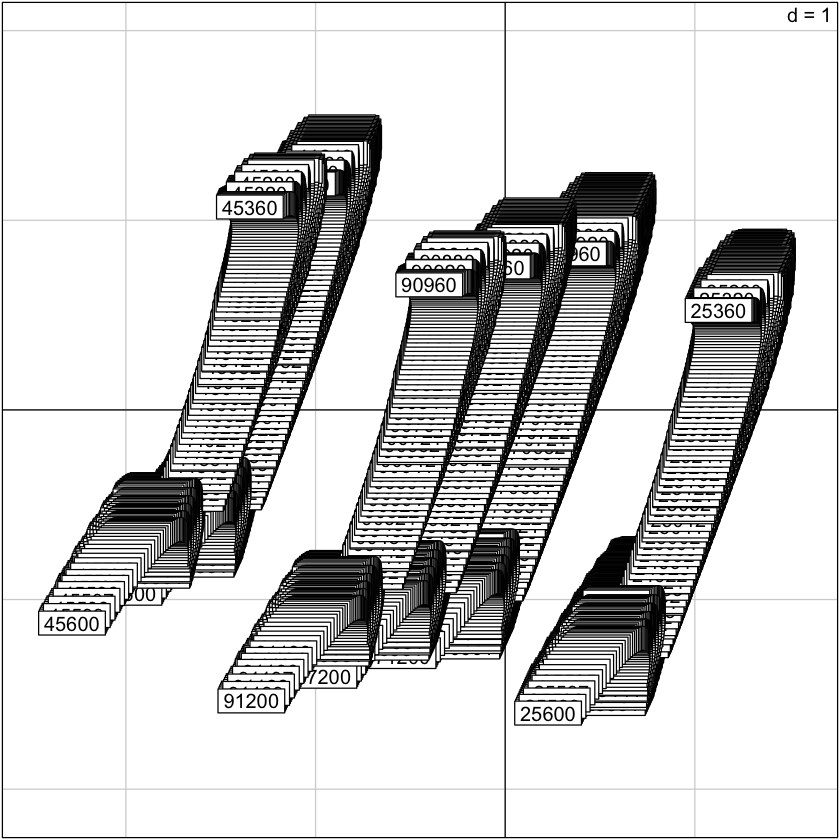

In [30]:
s.label(data.pca$li,
        xax = 3,  # 主成分 3
        yax = 4)  # 主成分 4

In [31]:
###############################

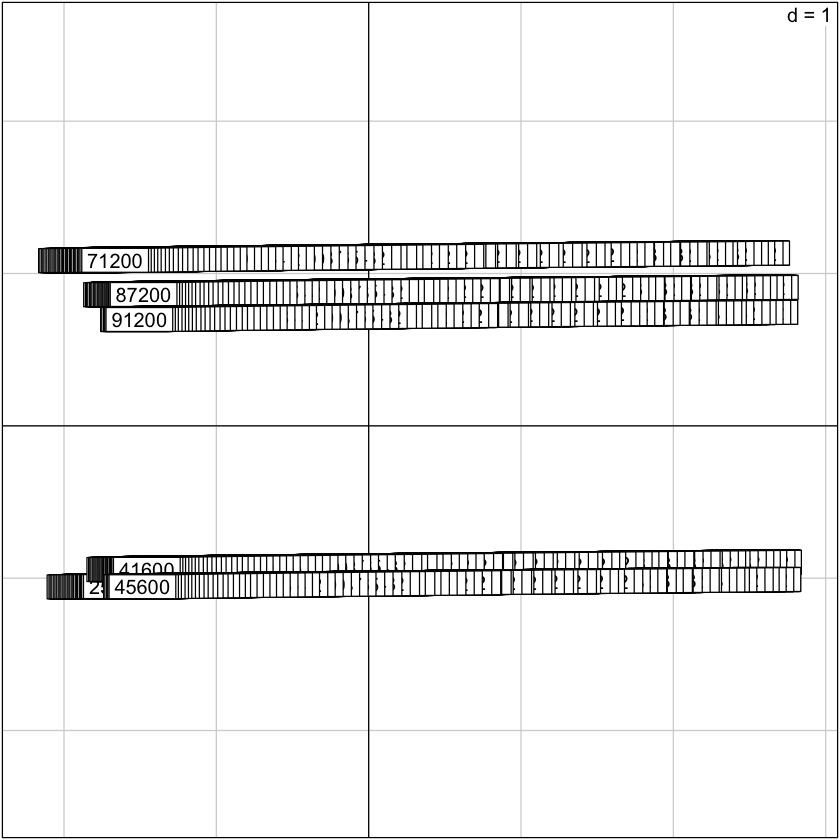

In [32]:
s.label(data.pca$l1,
        xax = 1,  # 主成分 1
        yax = 2)  # 主成分 2

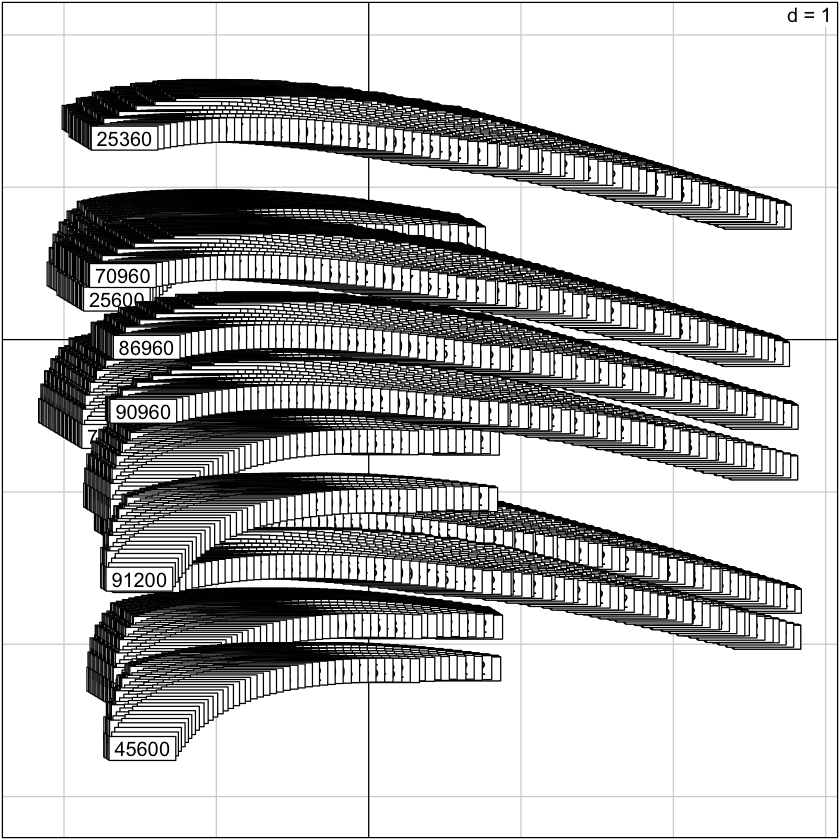

In [33]:
s.label(data.pca$l1,
        xax = 1,  # 主成分 1
        yax = 3)  # 主成分 3

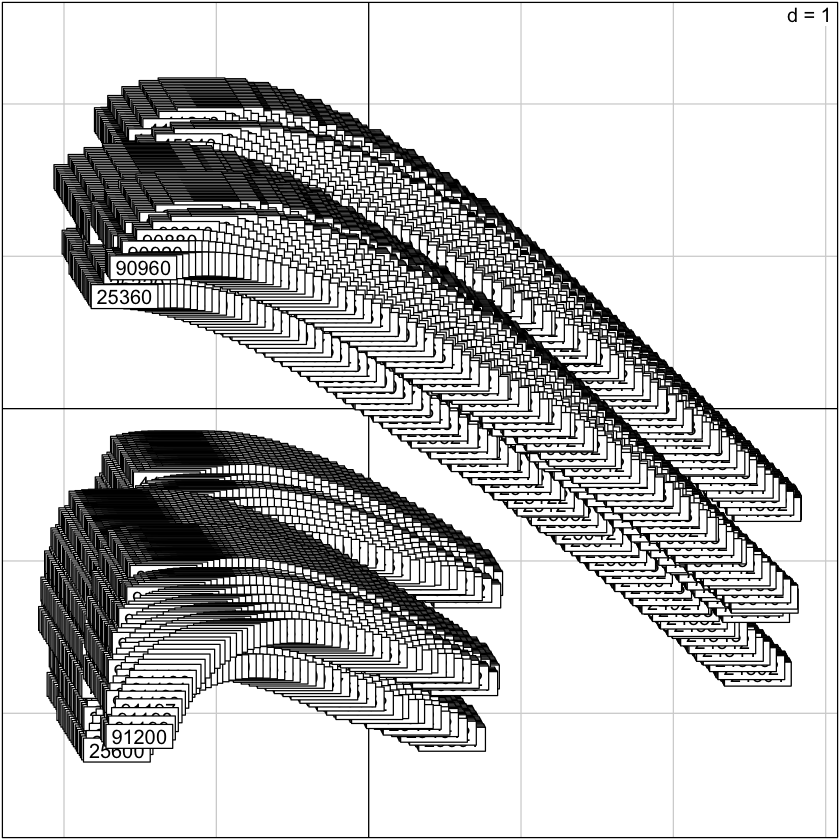

In [34]:
s.label(data.pca$l1,
        xax = 1,  # 主成分 1
        yax = 4)  # 主成分 4

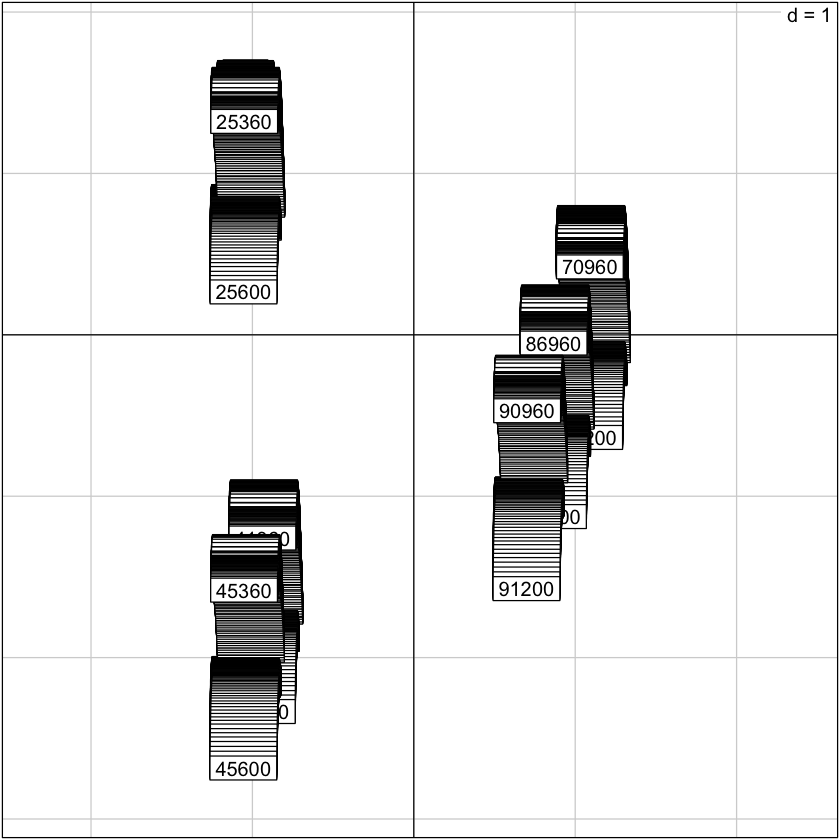

In [35]:
s.label(data.pca$l1,
        xax = 2,  # 主成分 2
        yax = 3)  # 主成分 3

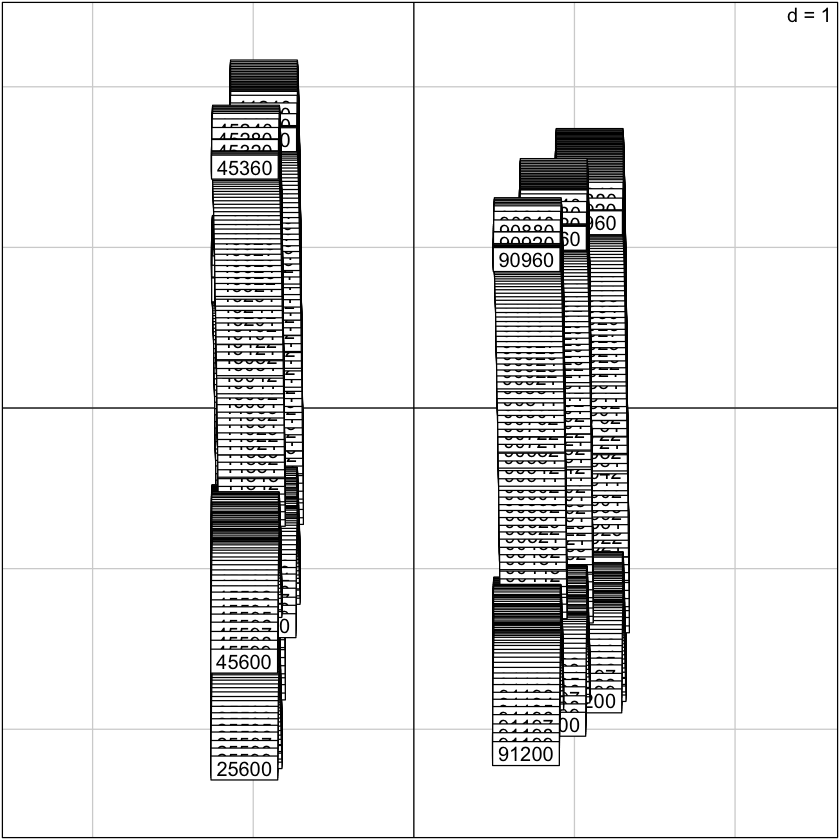

In [36]:
s.label(data.pca$l1,
        xax = 2,  # 主成分 2
        yax = 4)  # 主成分 4

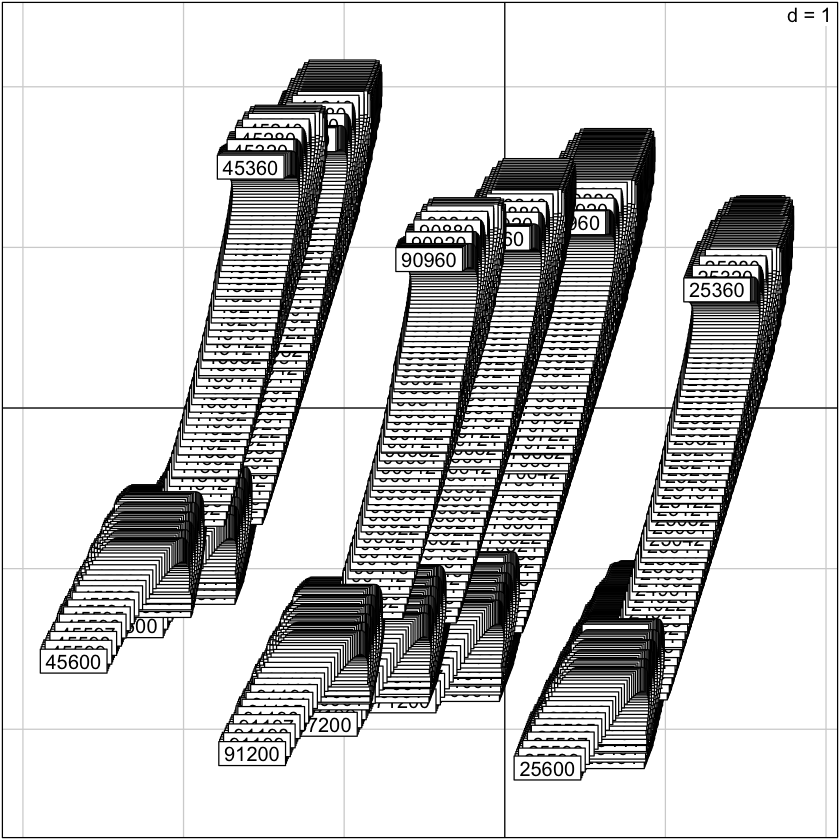

In [37]:
s.label(data.pca$l1,
        xax = 3,  # 主成分 3
        yax = 4)  # 主成分 4

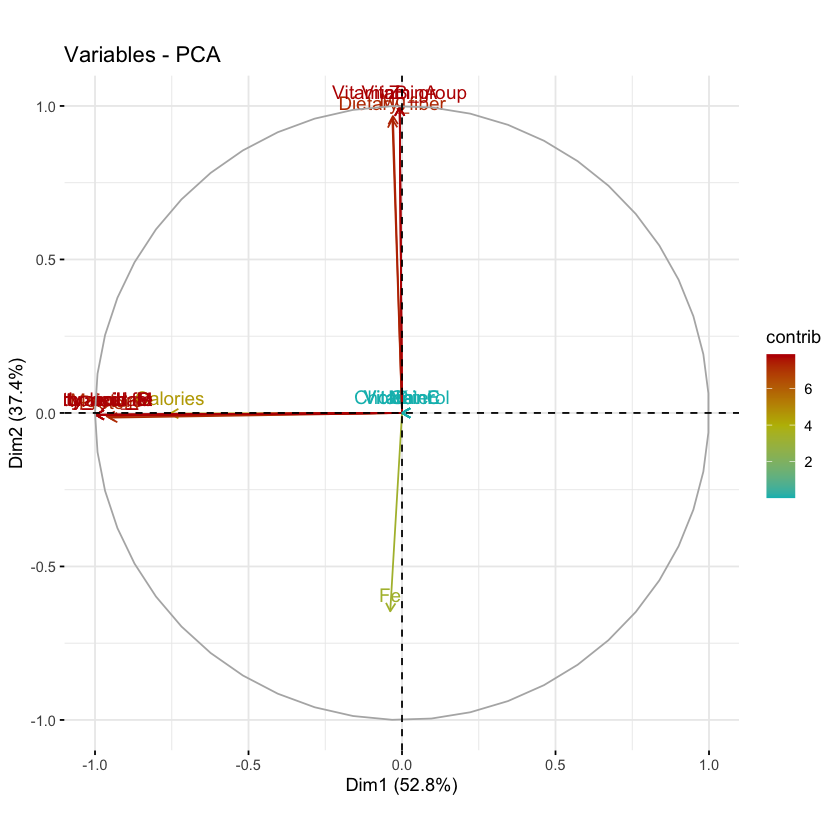

In [38]:
# 變數關係圖
fviz_pca_var(data.pca,
             col.var = "contrib",        # 依據對主成分的貢獻度上色
             #repel = TRUE,               # 避免文字重疊
             gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"))

In [39]:
# 變數相關資料
data.pca.var <- get_pca_var(data.pca)
data.pca.var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [40]:
data.pca.var$coord   # 座標

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Calories,-7.551256e-01,-2.093693e-03,2.393401e-01,6.025681e-01,8.030936e-02
Moisture,-9.620205e-01,-1.078939e-02,-1.340959e-01,-1.986524e-01,7.689844e-02
Protein,-9.541503e-01,-1.532784e-02,-1.680624e-01,-1.949763e-01,1.241989e-01
Saturated_fat,-9.976104e-01,-6.136084e-03,1.342582e-02,-1.292504e-02,-5.051797e-02
Carbohydrate,-9.976113e-01,-6.136056e-03,1.342267e-02,-1.293160e-02,-5.051177e-02
Dietary_fiber,-3.161595e-02,9.565084e-01,2.564753e-01,-7.097114e-02,-8.967462e-02
Na,1.798121e-23,2.471241e-27,9.305232e-27,1.546645e-19,1.171502e-26
K,-2.777740e-27,2.243609e-27,9.012011e-23,-1.162726e-27,1.633857e-20
Ca,3.475186e-28,-2.389177e-28,-9.920833e-28,1.244282e-28,5.653207e-28
Mg,-2.958519e-02,9.670490e-01,1.989723e-01,-4.869430e-02,-1.167469e-01


In [41]:
# 對主成分的貢獻度
data.pca.var$contrib 
aa=data.pca.var$contrib 
write.csv(aa, "feature_contribute3.csv", row.names = TRUE)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Calories,7.720526e+00,8.371853e-05,7.908412e+00,7.136933e+01,7.100104e+00
Moisture,1.253075e+01,2.223255e-03,2.482500e+00,7.756877e+00,6.509796e+00
Protein,1.232656e+01,4.487017e-03,3.899414e+00,7.472451e+00,1.698117e+01
Saturated_fat,1.347505e+01,7.190818e-04,2.488515e-02,3.283698e-02,2.809468e+00
Carbohydrate,1.347507e+01,7.190750e-04,2.487346e-02,3.287029e-02,2.808779e+00
Dietary_fiber,1.353384e-02,1.747323e+01,9.081329e+00,9.900630e-01,8.852613e+00
Na,4.377705e-45,1.166342e-52,1.195399e-50,4.701977e-36,1.510840e-49
K,1.044700e-52,9.613690e-53,1.121248e-42,2.657383e-52,2.938733e-37
Ca,1.635176e-54,1.090165e-54,1.358797e-52,3.043246e-54,3.518213e-52
Mg,1.185106e-02,1.786046e+01,5.465672e+00,4.660747e-01,1.500456e+01


In [42]:
# 主成分對該變數的重要性
data.pca.var$cos2    
bb=data.pca.var$cos2 
write.csv(bb, "feature_importance3.csv", row.names = TRUE)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Calories,5.702147e-01,4.383550e-06,5.728369e-02,3.630884e-01,6.449594e-03
Moisture,9.254835e-01,1.164109e-04,1.798170e-02,3.946277e-02,5.913370e-03
Protein,9.104029e-01,2.349428e-04,2.824496e-02,3.801577e-02,1.542536e-02
Saturated_fat,9.952265e-01,3.765153e-05,1.802528e-04,1.670567e-04,2.552065e-03
Carbohydrate,9.952282e-01,3.765118e-05,1.801681e-04,1.672262e-04,2.551439e-03
Dietary_fiber,9.995685e-04,9.149082e-01,6.577957e-02,5.036902e-03,8.041538e-03
Na,3.233241e-46,6.107034e-54,8.658735e-53,2.392111e-38,1.372417e-52
K,7.715840e-54,5.033783e-54,8.121635e-45,1.351932e-54,2.669487e-40
Ca,1.207692e-55,5.708168e-56,9.842293e-55,1.548238e-56,3.195875e-55
Mg,8.752834e-04,9.351838e-01,3.958997e-02,2.371135e-03,1.362985e-02


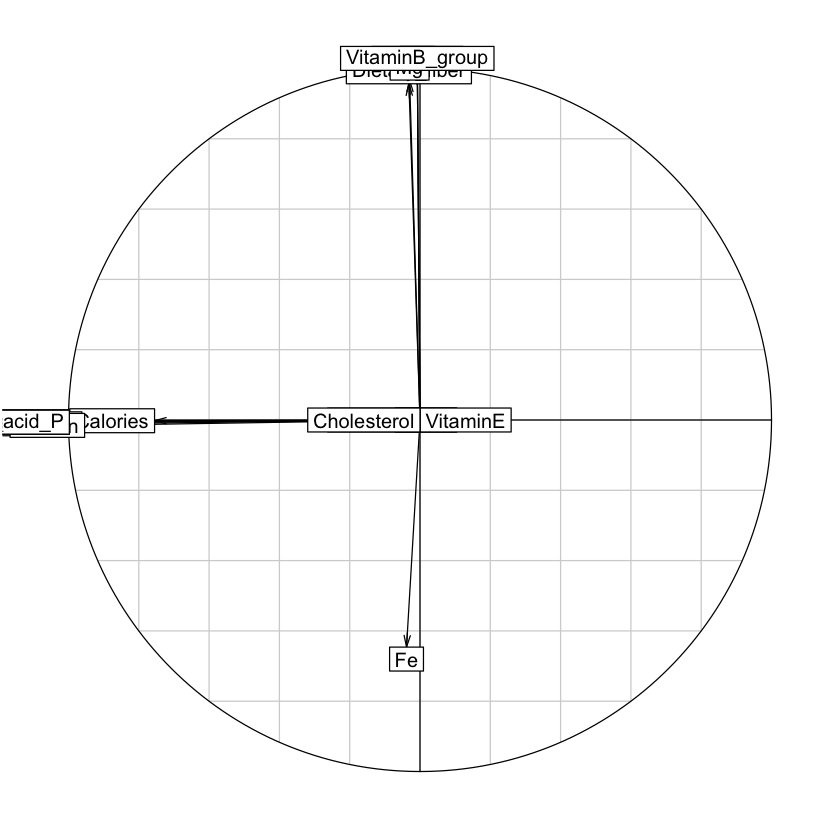

In [43]:
# 變數關係圖
s.corcircle(data.pca$co)

In [44]:
# 雙標圖（Biplot）
# fviz_pca_biplot(data.pca, repel = FALSE)

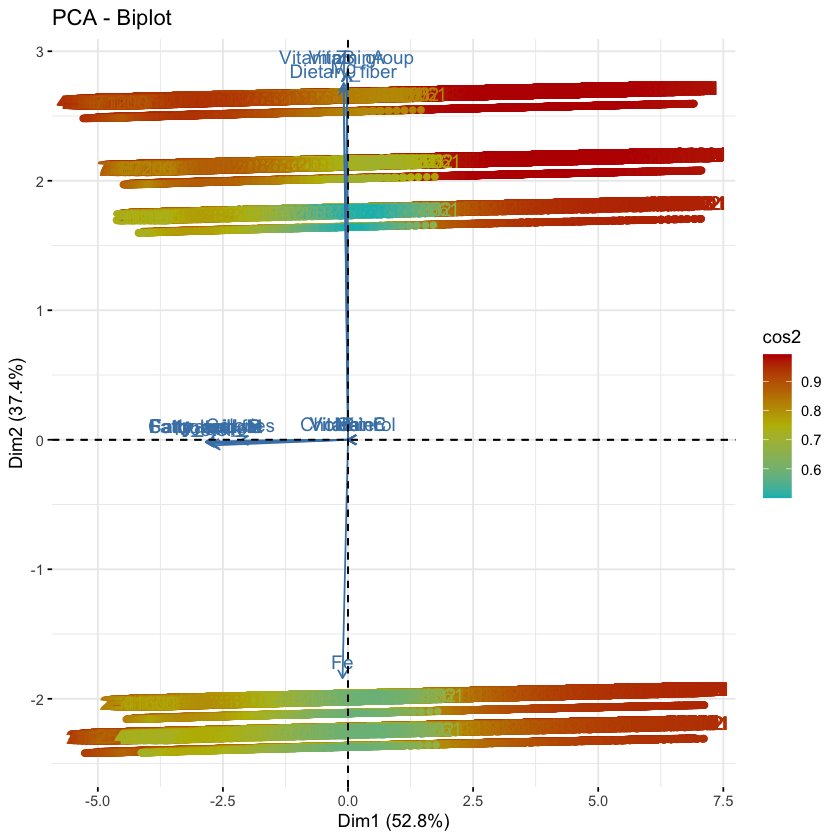

In [45]:
# 雙標圖（Biplot）
fviz_pca_biplot(data.pca,
                col.ind = "cos2",
                #repel = TRUE,
                gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"),
                repel = FALSE)

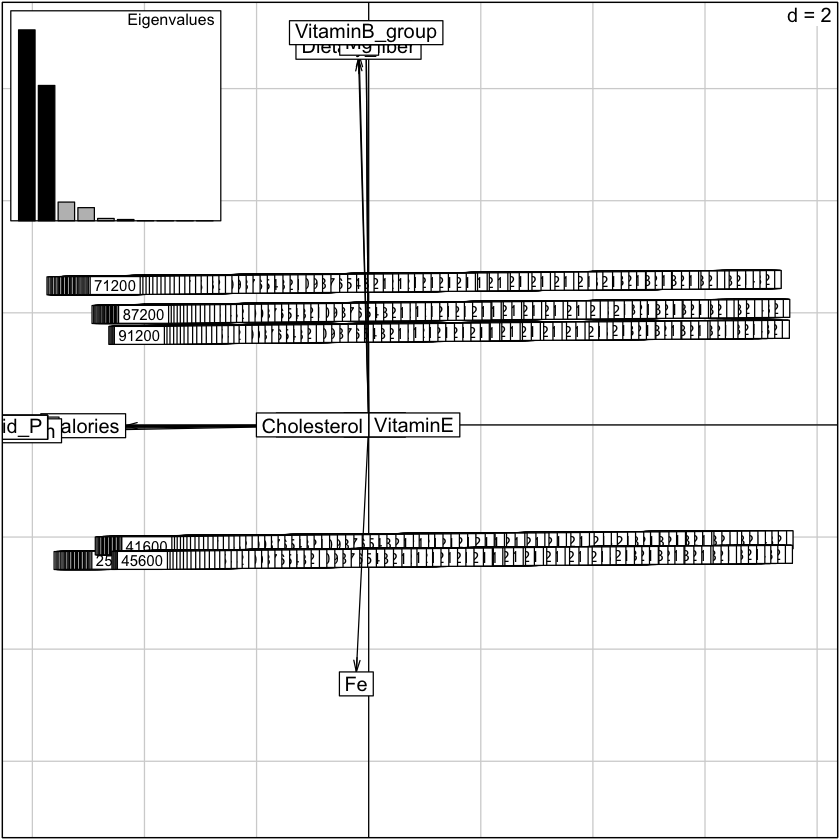

In [46]:
# 雙標圖（Biplot）
scatter(data.pca)

NULL

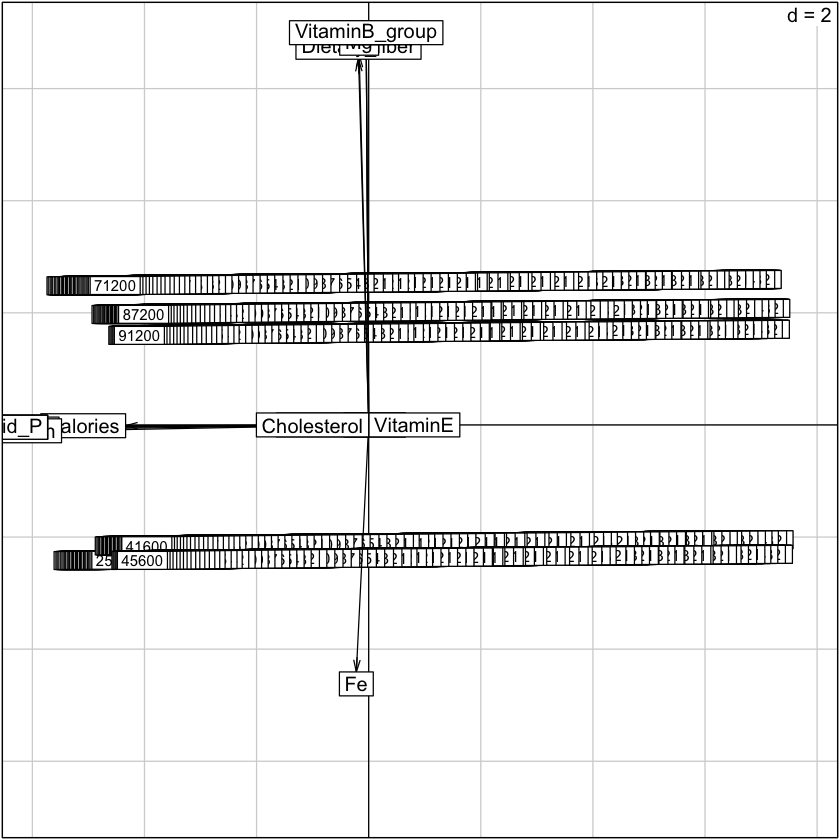

In [47]:
scatter(data.pca, posieig = "none")

In [48]:
======================================================================================
# # 預測用個體資料
# #ind.sup <- data[24:25, 1:10]


# # 計算各主成分座標
# #ind.sup.coord <- suprow(data.pca, ind.sup) %>% .$lisup



# # 繪製個體分布圖
# #p <- fviz_pca_ind(data.pca, repel = TRUE)

# # 加上新增的個體資料
# #fviz_add(p, ind.sup.coord)



# # 群組資料
# groups <- as.factor(data$Competition[1:23])


# # 標示群組資料
# fviz_pca_ind(data.pca,
#              col.ind = groups,            # 依據群組上色
#              addEllipses = TRUE,          # 加上橢圓
#              ellipse.type = "confidence", # 橢圓類型
#              legend.title = "Competition",
#              repel = TRUE)


# # 加上群組標示的個體分佈圖
# s.class(data.pca$li, fac = groups, col = c("#00AFBB",  "#FC4E07"))



# # 加上群組標示的雙標圖
# scatter(data.pca, clab.row = FALSE, posieig = "none")
# s.class(data.pca$li, fac = groups,
#         col = c("#00AFBB",  "#FC4E07"),
#         cstar = FALSE, add.plot = TRUE)


# # 新增的變數資料
# #var.sup <- data.active[1:23, 11:12, drop = FALSE]


# # 預測座標
# #var.coord <- supcol(data.active.pca, scale(var.sup)) %>% .$cosup

# # 計算 cos2
# #var.cos2 <- var.coord^2

# # 變數關係圖
# #p <- fviz_pca_var(data.pca)
# #fviz_add(p, var.coord, geom = "arrow")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '=='
1: ==
    ^
